In [ ]:
import os
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import datasets, layers, models, metrics
import matplotlib.pyplot as plt

# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


In [ ]:
from PIL import Image

#run this if images are not saved locally as np array

#in order for this to work, you need to download the data from kaggle as a zip and upload it to the following directory:
# /content/drive/MyDrive/CS3540/CS3540-Assignments/final-project/data/

glioma_path = 'Brain_Cancer raw MRI data/Brain_Cancer/brain_glioma'
menin_path = 'Brain_Cancer raw MRI data/Brain_Cancer/brain_menin'
tumor_path = 'data/Brain_Cancer raw MRI data/Brain_Cancer/brain_tumor'

image_data = []
image_labels = []

target_size = (256, 256) # this is a hyper param, rescaled size of images that will be used as the input shape for the CNN



for directory_path in [glioma_path, menin_path, tumor_path]:
    if os.path.exists(directory_path):
        label = os.path.basename(directory_path) # directory corresponds to label
        for filename in os.listdir(directory_path):
            full_path = os.path.join(directory_path, filename)
            if os.path.isfile(full_path):
                try:
                    img = Image.open(full_path).convert('RGB')
                    img_resized = img.resize(target_size) # <- we resize so the image data isn't incredibly huge but still provides enough information to train on
                    img_array = np.asarray(img_resized)
                    image_data.append(img_array)
                    image_labels.append(label)
                except Exception as e:
                    print(f"Error processing {full_path}: {e}")
    else:
        print(f"Directory not found: {directory_path}")

# Convert the lists to numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print("Image data shape:", image_data.shape)
print("Image labels shape:", image_labels.shape)
print("Example labels:", image_labels[:10])

Directory not found: data/Brain_Cancer raw MRI data/Brain_Cancer/brain_tumor
Image data shape: (4008, 256, 256, 3)
Image labels shape: (4008,)
Example labels: ['brain_glioma' 'brain_glioma' 'brain_glioma' 'brain_glioma'
 'brain_glioma' 'brain_glioma' 'brain_glioma' 'brain_glioma'
 'brain_glioma' 'brain_glioma']


In [ ]:
# Save the image data and labels
# only run this cell if generating images for the first time after running the above cell
np.save('image_data.npy', image_data)
np.save('image_labels.npy', image_labels)

print("Image data and labels saved as 'image_data.npy' and 'image_labels.npy'")

Image data and labels saved as 'image_data.npy' and 'image_labels.npy'


In [ ]:
# load image data, if saved locally

image_data = np.load('image_data.npy')
image_labels = np.load('image_labels.npy')

In [ ]:
# Normalize the image data

# run this cell after images have either been loaded or generated in the above cell
for image in image_data:
  image = image / 255

print("Image data normalized.")

Image data normalized.


In [ ]:
#run this after image normalization

x_train, x_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data split into training and testing sets.
X_train shape: (4844, 256, 256, 3)
X_test shape: (1212, 256, 256, 3)
y_train shape: (4844,)
y_test shape: (1212,)


In [ ]:
class_names = ['glioma', 'menin', 'tumor']

In [ ]:
# defining model

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3))) # input is of the form height, width, num colors
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(len(class_names)))

/Users/hkellner/Library/Mobile Documents/com~apple~CloudDocs/School/Machine Learning/Final_project/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

#run this cell to change image labels to ints (CNN wants this and won't work without it)

# change labels from strings to int

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the string labels to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Update y_train and y_test to use the encoded labels
y_train = y_train_encoded
y_test = y_test_encoded

In [ ]:
# training model

# only run this if weights are not saved locally
# this will take an extraordinarily long time (> 1 hour if you don't have colab pro)
# if you do have colab pro, T4 gpus will speed this up quite a bit, should take ~1 minute.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))




Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 109s 711ms/step - accuracy: 0.3355 - loss: 1.0986 - val_accuracy: 0.3259 - val_loss: 1.0995
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 105s 693ms/step - accuracy: 0.3412 - loss: 1.0985 - val_accuracy: 0.3259 - val_loss: 1.0995
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 103s 680ms/step - accuracy: 0.3412 - loss: 1.0985 - val_accuracy: 0.3259 - val_loss: 1.0994
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 106s 700ms/step - accuracy: 0.3412 - loss: 1.0985 - val_accuracy: 0.3259 - val_loss: 1.0993
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 108s 711ms/step - accuracy: 0.3412 - loss: 1.0986 - val_accuracy: 0.3259 - val_loss: 1.0994


38/38 - 7s - 184ms/step - accuracy: 0.3259 - loss: 1.0993
accuracy on test dataset:  0.3259075880050659


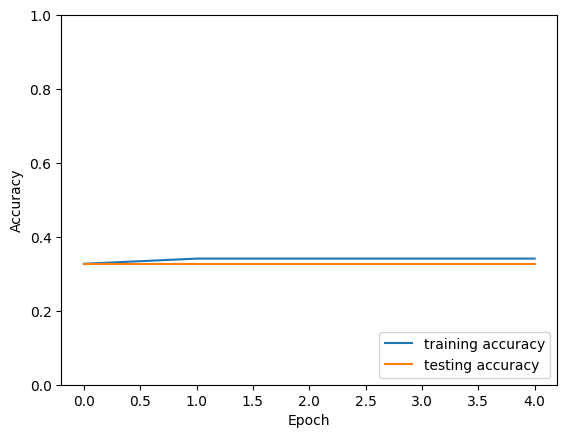

In [ ]:
# metrics + evaluation

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label = 'testing accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

checkpoint_path = "checkpoints.weights.h5"
model.save_weights(checkpoint_path)

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)


print("accuracy on test dataset: ", test_acc)

In [ ]:
#run this to load locally stored weights (won't work unless you have either trained once or have the weights saved to your drive)
checkpoint_path = "checkpoints.weights.h5"

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3))) # input is of the form height, width, num colors
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(len(class_names)))

model.load_weights(checkpoint_path)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(model.evaluate(x_test,  y_test, verbose=2))

/Users/hkellner/Library/Mobile Documents/com~apple~CloudDocs/School/Machine Learning/Final_project/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 - 7s - 193ms/step - accuracy: 0.3259 - loss: 1.0993
[1.0993390083312988, 0.3259075880050659]


In [ ]:
# evaluation: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/F1Score
y_pred = model.predict(x_test)
y_true = y_test

#one hot to match y_true to y_pred (for multiple classes)
y_true_one_hot = tf.one_hot(y_true, depth=len(class_names))
false_positives = tf.keras.metrics.FalsePositives()
false_negatives = tf.keras.metrics.FalseNegatives()
f1 = tf.keras.metrics.F1Score(average='weighted')
AUC = tf.keras.metrics.AUC(
    num_thresholds=200,
    curve='ROC',
    summation_method='interpolation',
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False)

AUC.update_state(y_test, y_pred)
f1.update_state(y_true_one_hot, y_pred)
false_positives.update_state(y_true_one_hot, y_pred)
false_negatives.update_state(y_true_one_hot, y_pred)

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step


ValueError: Argument `segment_ids` and `data` should have same leading dimension. Got (3636,) v.s. (1212,).

In [ ]:
print("f1 score: ", f1.result().numpy())
print("AUROC: AUC: ", AUC.result().numpy())
print("false negatives: ", false_negatives.result().numpy())
print("false positives: ", false_positives.result().numpy())

f1 score:  0.16021591
AUROC: AUC:  0.4944307
false negatives:  1212.0
false positives:  0.0
